In [1]:
#Importing the necessary libraries
import pandas as pd # Import Pandas For Analyzing, Cleaning, Exploring, And Manipulating Data
import numpy as np  # Import Numpy For Working With Mathematices Part/Numerical Data
import seaborn as sns # Import Seaborn For Visualize Data And Ploting Statistical Graph
import warnings       
warnings.filterwarnings("ignore") # We Use Warnings For Ignore Warnings
import matplotlib.pyplot as plt# Import Matplotlib For Visualize Data And Ploting Statistical Graph.

### Business Case: Blood Donation Prediction 

We Have To Create A Model Which Can Predict The Blood Donation In The Blood Bank.

1. Problem Statement :-
            Blood banks often struggle to maintain an adequate and steady supply of blood due to irregular donor participation. Traditionally, donation             drives are conducted periodically, but predicting which donors are likely to donate again can make campaigns more targeted and cost-
            effective.

            This project aims to predict the likelihood of a donor donating blood in a given month using their donation history (time since last                    donation, number of donations, etc.).


### Dataset Information

Target Variable: Made Donation in March 2007 (1 = Yes, 0 = No).



### Dataset Information

--> Target Value

Target Variable: Made Donation in March 2007 (1 = Yes, 0 = No).

### Attributes

Attribute Information :-

Months since Last Donation – Time gap between last donation and current reference date.

Number of Donations – Total donations made by a donor.

Total Volume Donated (c.c.) – Amount of blood donated.

Months since First Donation – How long the donor has been associated with the blood bank.

In [2]:
data = pd.read_csv("Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv") # Call The Full Dataset.
data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


## Basic Checks 

In [4]:
data.head() # Its Provide First Five (5) Columns Of The Data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [5]:
data.tail() #  Its Provide Last Five (5) Columns Of The Data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [6]:
data.describe() #Statistical Information

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [7]:
data.info() # Gives The Information Of Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [8]:
df = data.drop(columns=["Unnamed: 0"]) # For Droping The Unused Column

In [9]:
df # Display The Full DataFrame To Inspect The Data

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
571,23,1,250,23,0
572,16,3,750,86,0
573,21,2,500,52,0
574,39,1,250,39,0


## Step 1
Unvariant Analysis 

In [11]:
df.head()  # Its Provide First Five (5) Columns Of The Data

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


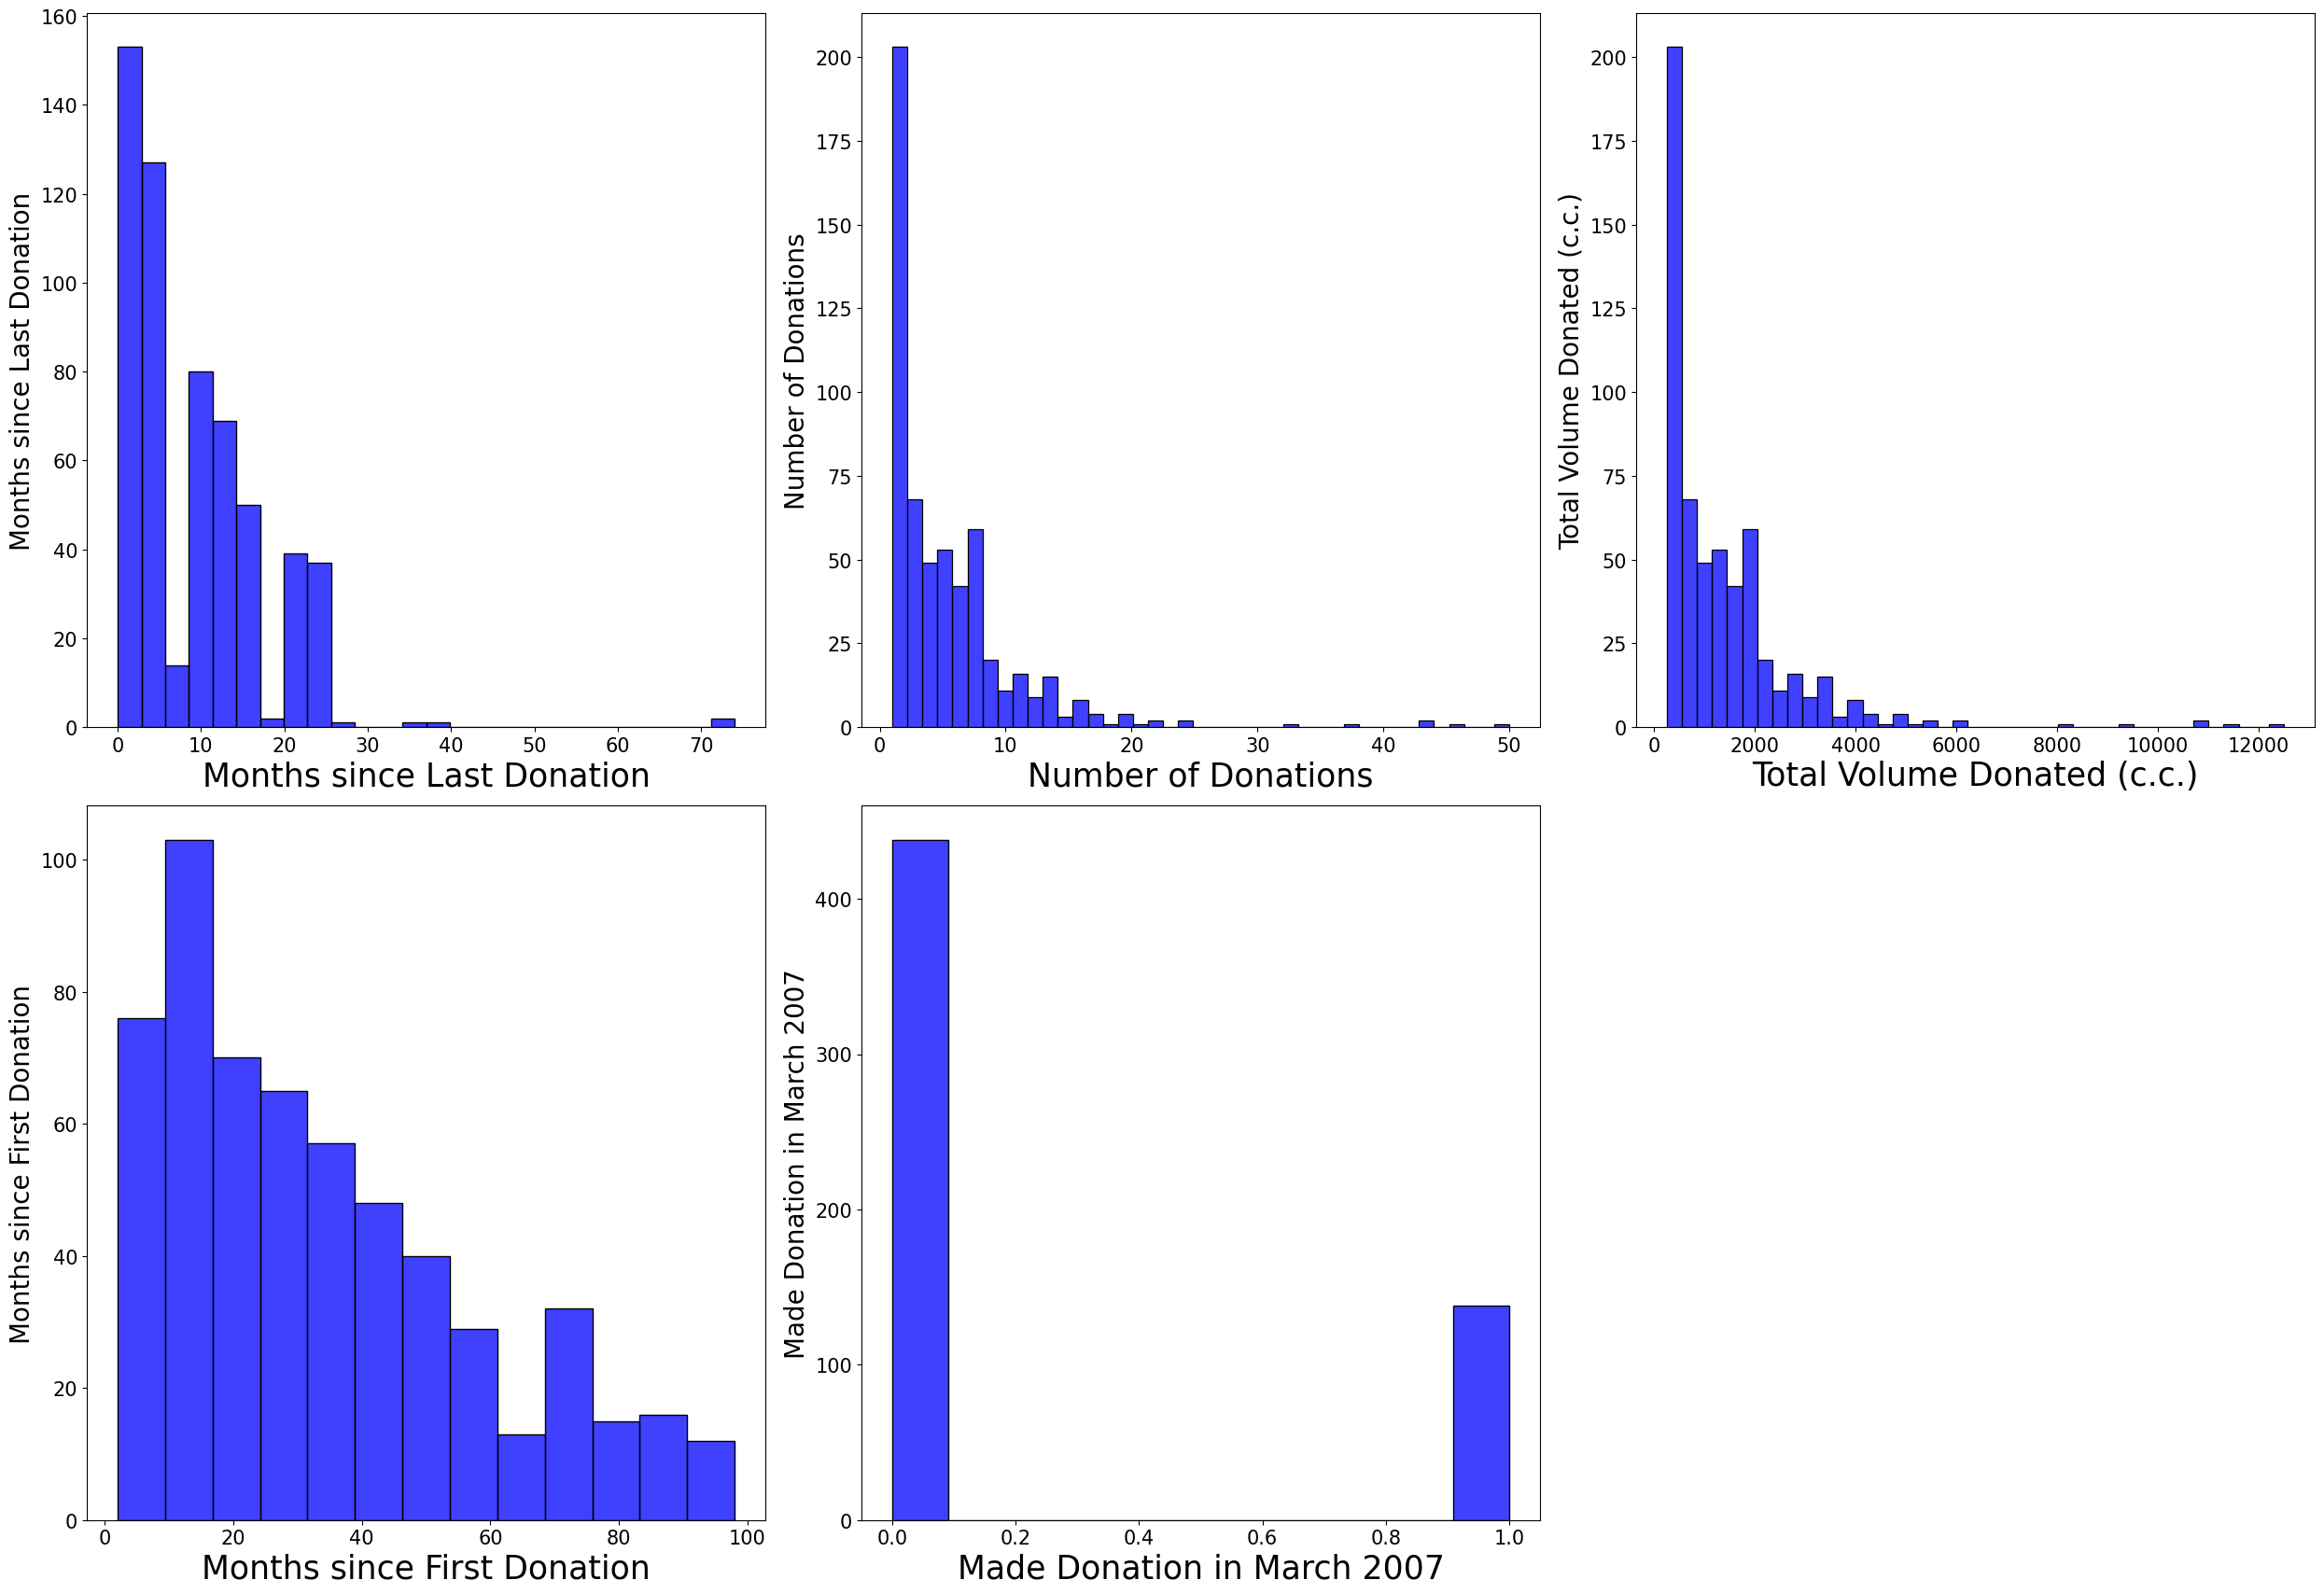

In [12]:
#Run Single Loop For Plotting All Graph

plt.figure(figsize=(25,25),facecolor='white')  # For Fixed Size And Colour Of Graph.               
plot_num = 1

for column in df:                              # Assign A Loop.
    if plot_num <= 9:                          # Ensure That No More Than 9 Subplots Are Created (Prevent Exceeding Layout).                      
        plt.subplot(3,3,plot_num)              # Use Subplots For How Many Rows And Columns We want With PlotNumber.
        sns.histplot(data[column],color="blue")# Import Graph While Using Histplot.
        plt.xlabel(column,fontsize=25)         # Set The X-Axis Label To The Columns Name , With A Font Size Of 25.
        plt.ylabel(column,fontsize=20)         # Set The Y-Axis Label To The Columns Name , With A Font Size Of 20.
        plt.xticks(fontsize=15)                # Set The X-Axis Ticks To The Columns Name , With A Font Size Of 15.
        plt.yticks(fontsize=15)                # Set The Y-Axis Ticks To The Columns Name , With A Font Size Of 25.
    plot_num = plot_num+1                      # Increment The 'Plot' Counter To Move To The Next Subplot Position.
plt.tight_layout()                             # Display All The Subplots Together In The Same Figure.                           

In [13]:
for column in df:
    print(column)

Months since Last Donation
Number of Donations
Total Volume Donated (c.c.)
Months since First Donation
Made Donation in March 2007


### Insights

## 1. Months Since Last Donation
. If The Mean Is High (E.G., >12 Months), Most Donors Haven’t Donated In Over A Year.

. A Large Difference Between Min And Max Shows There Are Both Recent And Very Old Donors.

## 2. Number Of Donations
. If The Median Is Low (1–2), Most Donors Are One-Time Or Rare Donors.

. If The 75% Value Is Low , Even Frequent Donors Aren’t Donating Often.

## 3. Total Volume Donated (c.c.)
. Should Be Correlated With The Number Of Donations (Check Correlation).

. Outliers Here May Indicate Recording Errors Or Exceptionally High Donors.

## 4. Months Since First Donation
. If Mean Is High, Many Donors Have Been With The Blood Bank For Years.

. Compare With Number Of Donations → Are Long-Term Donors Donating Regularly? If Not, Engagement Is Dropping.

## 5. Made Donation In March 2007 (Target)
. If Dataset Is Imbalanced (E.G., 80% Didn’t Donate), You Need SMOTE Or Resampling.

. This Shows How Many Active Donors Can Be Expected In A Given Campaign.

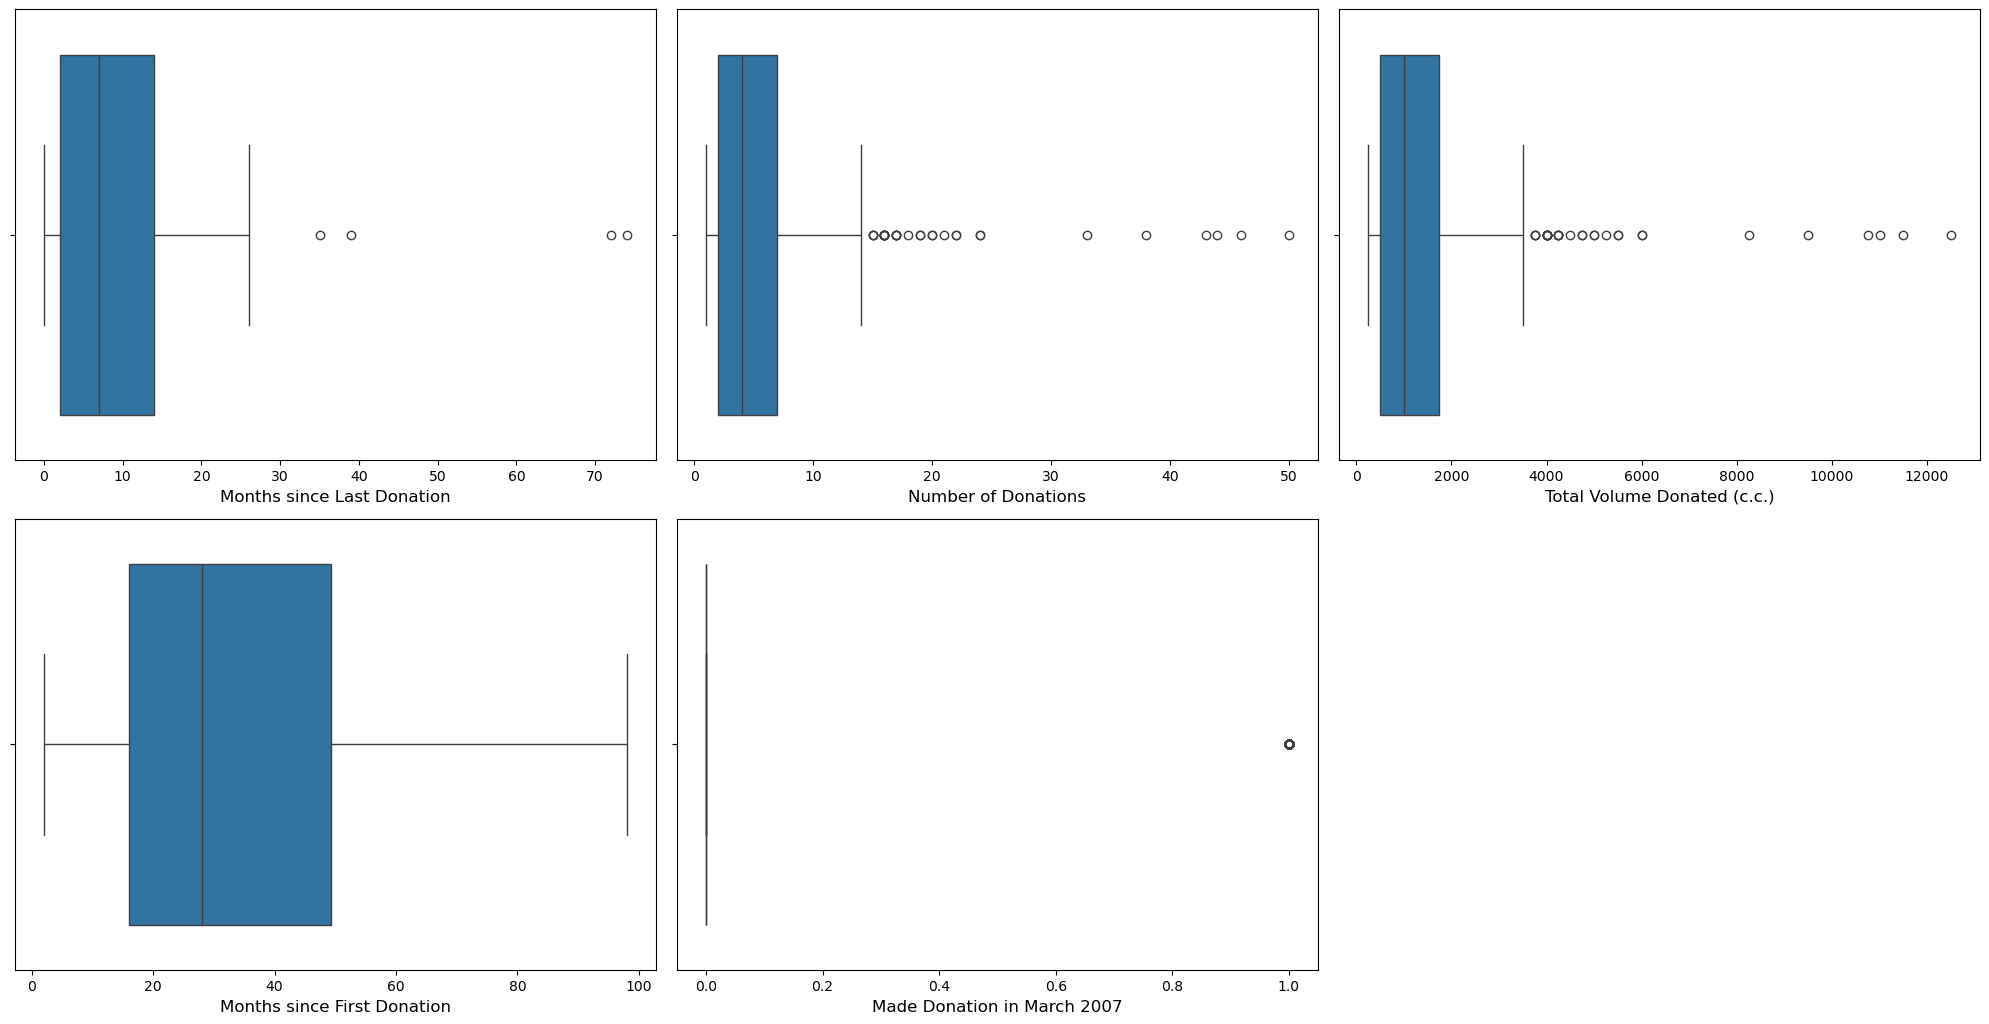

In [14]:
plt.figure(figsize=(20, 15)) # Creates A large Canvas For Multiple Plots.
plotnumber = 1               # Tracks Subplot Positions.

for column in df.columns:
    if plotnumber <= 9:
        if column != 'Unnamed: 0':  # Ensure The Column Exists Or Skip It.
            ax = plt.subplot(3, 3, plotnumber) # Creates A Subplot in a 3×3 Grid.
            sns.boxplot(x=df[column]) # Draws Boxplots For Each Column.
            plt.xlabel(column, fontsize=12) # Adds Column Names As X-axis Labels.
            plotnumber += 1

plt.tight_layout() # Adjusts Spacing Between Subplots.
plt.show() # Displays All Plots Together.

In [15]:
Q1 = df['Months since Last Donation'].quantile(0.25) # Shows The Value Below Which 25% Of Data Falls.
Q3 = df['Months since Last Donation'].quantile(0.75) #  Shows The Value Below Which 75% Of Data Falls.
IQR = Q3-Q1                                          #  Difference Between Q3 & Q1 = IQR, Which Represents The Middle Spread Of The Data.
print(IQR)                                           # Display The IQR Value .

12.0


In [16]:
lower_boundry = Q1-1.5*IQR # Any Value Below This Boundary Is Considered A Lower Outlier.
print(lower_boundry)       # Print The Value Of Lower Boundary.
upper_boundry = Q3+1.5*IQR # Any Value Below This Boundary Is Considered A Upper Outlier.
print(upper_boundry)       # Print The Value Of Upper Boundary.

-16.0
32.0


In [17]:
Q1 = df['Number of Donations'].quantile(0.25) # Shows The Value Below Which 25% Of Data Falls.
Q3 = df['Number of Donations'].quantile(0.75) # Shows The Value Below Which 75% Of Data Falls.
IQR = Q3-Q1                                   # Difference Between Q3 & Q1 = IQR, Which Represents The Middle Spread Of The Data.
print(IQR)                                    # Display The IQR Value .
print(IQR)

5.0


In [18]:
lower_boundry = Q1-1.5*IQR # Any Value Below This Boundary Is Considered A Lower Outlier.
print(lower_boundry)       # Print The Value Of Lower Boundary.
upper_boundry = Q3+1.5*IQR # Any Value Below This Boundary Is Considered A Upper Outlier.
print(upper_boundry)       # Print The Value Of Upper Boundary.

-5.5
14.5


In [19]:
df.loc[df["Months since Last Donation"] > upper_boundry, "Months since Last Donation"] = np.median(df['Months since Last Donation'])


In [20]:
df

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
571,7,1,250,23,0
572,7,3,750,86,0
573,7,2,500,52,0
574,7,1,250,39,0


<Axes: xlabel='Months since Last Donation'>

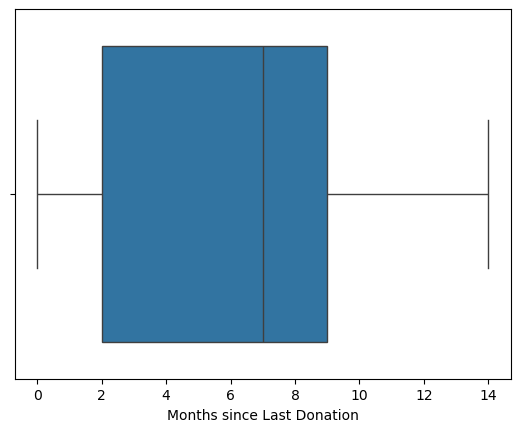

In [21]:
sns.boxplot(x=df['Months since Last Donation']) # To Detect The Outliers.

In [22]:
df.loc[df["Number of Donations"] > upper_boundry, "Number of Donations"] = np.median(df['Number of Donations'])


<Axes: xlabel='Number of Donations'>

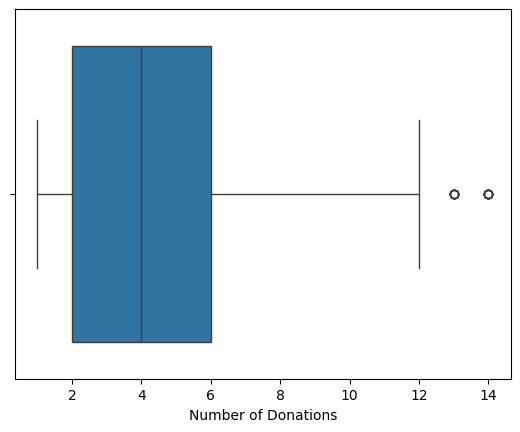

In [23]:
sns.boxplot(x=df['Number of Donations']) # To Detect The Outliers.

In [24]:
Q1 = df['Total Volume Donated (c.c.)'].quantile(0.25) # Shows The Value Below Which 25% Of Data Falls.
Q3 = df['Total Volume Donated (c.c.)'].quantile(0.75) # Shows The Value Below Which 75% Of Data Falls.
IQR = Q3-Q1                                           # Difference Between Q3 & Q1 = IQR, Which Represents The Middle Spread Of The Data.
print(IQR)                                            # Display The IQR Value .
print(IQR)

1250.0


In [25]:
lower_boundry = Q1-1.5*IQR # Any Value Below This Boundary Is Considered A Lower Outlier
print(lower_boundry)       # Print The Value Of Lower Boundary.      
upper_boundry = Q3+1.5*IQR # Any Value Below This Boundary Is Considered A Upper Outlier
print(upper_boundry)       # Print The Value Of Upper Boundary.

-1375.0
3625.0


In [26]:
df.loc[df["Total Volume Donated (c.c.)"] > upper_boundry, "Total Volume Donated (c.c.)"] = np.median(df['Total Volume Donated (c.c.)'])


<Axes: xlabel='Total Volume Donated (c.c.)'>

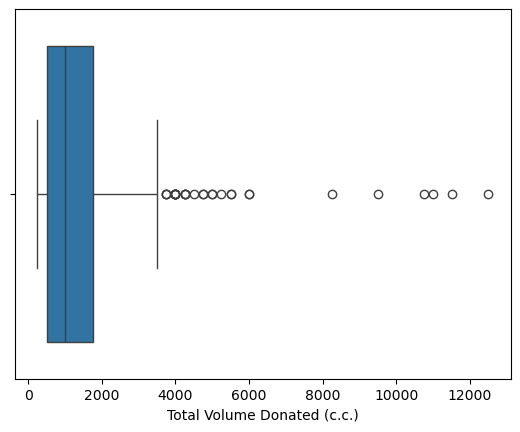

In [27]:
sns.boxplot(x=data['Total Volume Donated (c.c.)']) # To Detect The Outliers.

In [28]:
Q1 = df['Months since First Donation'].quantile(0.25) # Shows The Value Below Which 25% Of Data Falls.
Q3 = df['Months since First Donation'].quantile(0.75) # Shows The Value Below Which 75% Of Data Falls.
IQR = Q3-Q1                                           # Difference Between Q3 & Q1 = IQR, Which Represents The Middle Spread Of The Data.
print(IQR)                                            # Display The IQR Value .
print(IQR)

33.25


In [29]:
lower_boundry = Q1-1.5*IQR  # Any Value Below This Boundary Is Considered A Lower Outlier
print(lower_boundry)        # # Print The Value Of Lower Boundary. 
upper_boundry = Q3+1.5*IQR  # Any Value Below This Boundary Is Considered A Upper Outlier
print(upper_boundry)        # Print The Value Of Upper Boundary. 

-33.875
99.125


In [30]:
df.loc[df["Months since First Donation"] > upper_boundry, "Months since First Donation"] = np.median(data['Months since First Donation'])

<Axes: xlabel='Months since First Donation'>

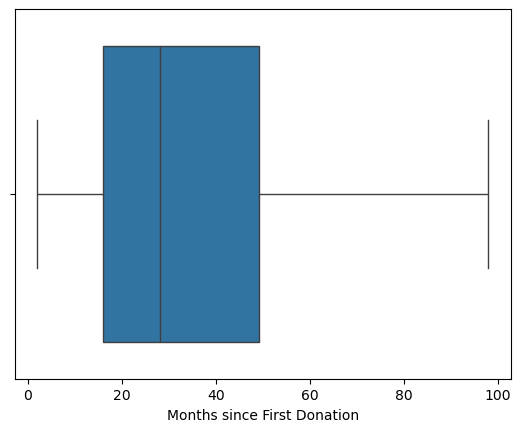

In [31]:
sns.boxplot(x=data['Months since First Donation']) # To Detect The Outliers.

### Corelation

In [33]:
df.corr()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
Months since Last Donation,1.000000,-0.086176,-0.086176,0.132816,-0.234027
Number of Donations,-0.086176,1.000000,1.000000,0.518697,0.191408
Total Volume Donated (c.c.),-0.086176,1.000000,1.000000,0.518697,0.191408
Months since First Donation,0.132816,0.518697,0.518697,1.000000,-0.019819
Made Donation in March 2007,-0.234027,0.191408,0.191408,-0.019819,1.000000


<Axes: >

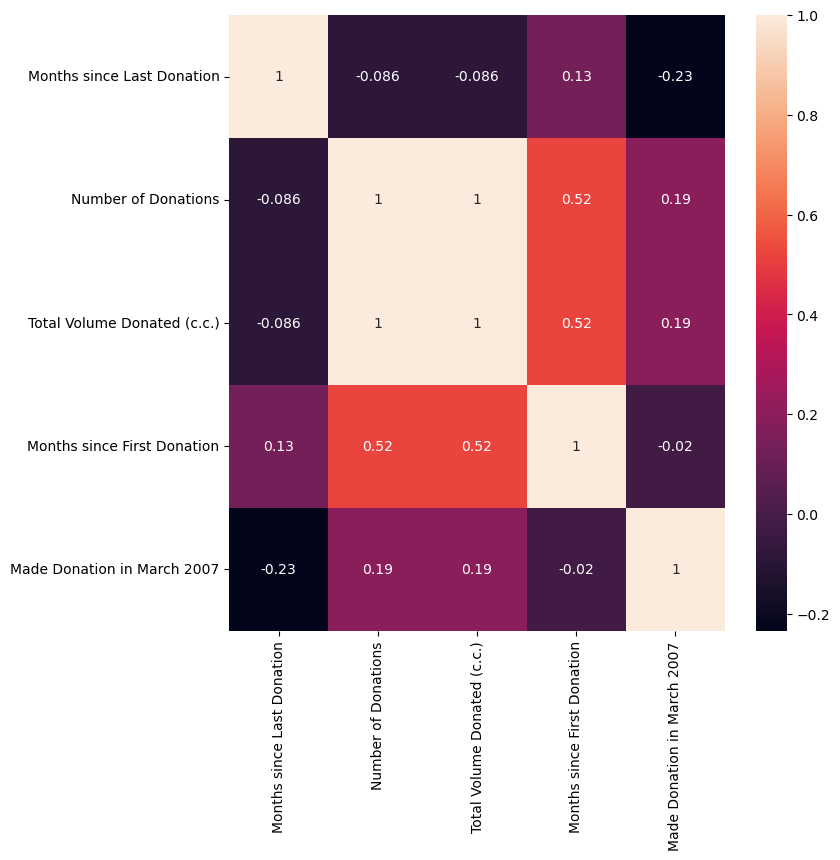

In [34]:
plt.figure(figsize=(8,8))         #Creates A Figure With A Large Size For Better Visibility.
sns.heatmap(df.corr(),annot=True) #Plots A Heatmap Of The Correlation Matrix Of The Dataframe df. annot=True Shows Correlation Values Inside Each Cell.
plt.show()                        # Displays The Plotted Heatmap.

# Model Creation

In [36]:
df

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,4,1000,98,1
1,0,13,3250,28,1
2,1,4,1000,35,1
3,2,4,1000,45,1
4,1,4,1000,77,0
...,...,...,...,...,...
571,7,1,250,23,0
572,7,3,750,86,0
573,7,2,500,52,0
574,7,1,250,39,0


In [37]:
x = df[["Months since Last Donation","Number of Donations","Total Volume Donated (c.c.)","Months since First Donation"]]
y = df["Made Donation in March 2007"]

In [38]:
x # Displays All The Column Except Target Column ; Useful For Verifying Class Labels.

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,4,1000,98
1,0,13,3250,28
2,1,4,1000,35
3,2,4,1000,45
4,1,4,1000,77
...,...,...,...,...
571,7,1,250,23
572,7,3,750,86
573,7,2,500,52
574,7,1,250,39


In [39]:
y # Displays The Entire Target Column; Useful For Verifying Class Labels

0      1
1      1
2      1
3      1
4      0
      ..
571    0
572    0
573    0
574    0
575    0
Name: Made Donation in March 2007, Length: 576, dtype: int64

### Model Selection 

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=30) # Splits The Data Into Training And Testing Sets (80% Train, 20% Test) With A Fixed Random State For Reproducibility.

In [43]:
x_train # Displays The Training Feature Data

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
453,2,1,250,2
224,14,5,1250,26
351,7,1,250,21
154,2,2,500,14
451,2,1,250,2
...,...,...,...,...
430,3,8,2000,50
145,4,4,1000,26
140,2,1,250,2
500,14,4,1000,26


In [44]:
x_test  # Displays The Testing Feature Data.

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
61,2,2,500,4
563,7,3,750,39
479,11,2,500,11
162,11,9,2250,38
329,7,3,750,28
...,...,...,...,...
573,7,2,500,52
540,7,3,750,35
552,7,5,1250,71
230,11,4,1000,28


In [45]:
y_train # Display The Training Feature Data.

453    0
224    0
351    0
154    0
451    0
      ..
430    0
145    1
140    0
500    0
421    1
Name: Made Donation in March 2007, Length: 460, dtype: int64

In [46]:
y_test # Display The Testing Feature Data.

61     0
563    0
479    0
162    0
329    0
      ..
573    0
540    0
552    0
230    0
152    0
Name: Made Donation in March 2007, Length: 116, dtype: int64

### Scailing

* Scailing Can Be Done Only On Continuous Data.
* They Are :Months since Last Donation, Number of Donations,Total Volume Donated (c.c.), Months since First Donation

In [48]:
from sklearn.preprocessing import StandardScaler # Imports StandardScaler And Initializes The Scaler — Ready For Fitting And Transforming The Data.
scaler = StandardScaler() #  Creates A Scaler Object.
X_train = scaler.fit_transform(x_train) 
X_train # Scaled Training Features.

array([[-1.0365557 , -1.07204933, -1.07204933, -1.32853055],
       [ 1.97808469,  0.1701237 ,  0.1701237 , -0.3264825 ],
       [ 0.21954446, -1.07204933, -1.07204933, -0.53524251],
       ...,
       [-1.0365557 , -1.07204933, -1.07204933, -1.32853055],
       [ 1.97808469, -0.14041956, -0.14041956, -0.3264825 ],
       [-0.53411563,  0.79121021,  0.79121021, -0.07597049]])

In [49]:
df.columns # Displays All The Columns Of DataFrame.

Index(['Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [50]:
col1 = ['Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation'] # Specifies Which Numerical Columns To Standardize (Scale) Using StandardScaler.

In [51]:
df.isnull().sum()  # Rechecks For Missing Values In The Dataset To Confirm If Imputation Was Successful And No NaNs Remain.

Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

In [111]:
scaler = StandardScaler()
x_smote_scaled = pd.DataFrame(
    scaler.fit_transform(x_smote),
    columns=col1    # Keep original column names
)

x_test_scaled = pd.DataFrame(
    scaler.transform(x_test),
    columns=col1
)

In [ ]:
x_test_scaled  # It Is The Scaled Version Of Dataset.

### Data Balancing

In [72]:
from imblearn.over_sampling import SMOTE # Assign SMOTE For Balancing Data.
sm = SMOTE()                             # Creates A SMOTE Object.
x_smote,y_smote = sm.fit_resample(x_train,y_train) # The New Balanced Datasets.

In [74]:
from collections import Counter # For Checking The Class Distribution After Applying Smote.
print("Actual classes",Counter(y_train)) # Counts The Original Class Distribution In The Training Data.
print("SMOTE classes",Counter(y_smote))  # # Counts The Original Class Distribution After Smote.

Actual classes Counter({0: 349, 1: 111})
SMOTE classes Counter({0: 349, 1: 349})


### Model Creation

In [78]:
from sklearn.linear_model import LogisticRegression #   # Imports Logistic Regression Model.

In [80]:
LR = LogisticRegression() # Instantiate The Model.
LR

LogisticRegression()

In [82]:
LR.fit(x_train,y_train) # Train The Model On Training Data.

LogisticRegression()

In [84]:
y_pred = LR.predict(x_test) # Predict On Test Data.

In [86]:
y_pred # Predicted Data.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [115]:
from sklearn.metrics import r2_score, classification_report, mean_squared_error, mean_absolute_error,f1_score,recall_score,precision_score,accuracy_score  # Import Metrices For Scores.

In [117]:
mean_squared_error(y_test,y_pred) # For Finding The Mean_Squared_Error

0.21551724137931033

In [119]:
r2_score(y_test,y_pred) # For Finding The r2_Score.

-0.20682480233042

## Hyperparameter Tunning

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [124]:
df = pd.read_csv("Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv") # Load The Dataset.
df.drop(columns=["Unnamed: 0"], inplace=True)                          # Remove The Unnecessary Index Column.

# Split into features and target
X = df.drop("Made Donation in March 2007", axis=1)                     # Contains Independent Variable.
y = df["Made Donation in March 2007"]                                  # Contains Dependent Variable.

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52) # Splits The Data Into Training And Testing Sets (80% Train, 20% Test) With A Fixed Random State For Reproducibility.

# Feature scaling
scaler = StandardScaler() # Ensures All Numeric Features Are Standardized.
X_train_scaled = scaler.fit_transform(X_train) # Applies Scailing To Training Data.
X_test_scaled = scaler.transform(X_test) # Applies The Same Scailing To Test Data.


In [126]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],       # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],    # solvers that support l1/l2/elasticnet
    'max_iter': [100, 200, 500]
}


In [128]:
log_reg = LogisticRegression() # Creates A Logistic Regression Model.

# Perform grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train) # Selects The Best Performing Model.

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [130]:
print("Best Parameters:", grid_search.best_params_) # Prints The Optimal Hyperparameters Chosen By GridSearchCV.

# Best model
best_model = grid_search.best_estimator_

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [132]:
y_pred = best_model.predict(X_test_scaled) # Prediction Of Best Model.

# Evaluate
a1 =accuracy_score(y_test, y_pred) # For Finding The Accuracy Score.
a1
f1 = f1_score(y_test,y_pred,average="weighted") # For Finding The f1 Score.
f1
r1 = recall_score(y_test,y_pred,average="weighted") # For Finding The recall score.
r1
p1 = precision_score(y_test,y_pred,average="weighted") # For Finding The precision score.
p1

print (classification_report(y_test, y_pred)) # Prints The Classification Report Of All The Metrices.

              precision    recall  f1-score   support

           0       0.79      0.99      0.88        89
           1       0.75      0.11      0.19        27

    accuracy                           0.78       116
   macro avg       0.77      0.55      0.53       116
weighted avg       0.78      0.78      0.72       116



In [136]:
from sklearn.metrics import confusion_matrix # Import Confusion Matrix

In [138]:
confusion_matrix(y_test,y_pred)

array([[88,  1],
       [24,  3]], dtype=int64)

### SVM :- Support Vector Machine

In [141]:
from sklearn.svm import SVC # call SVC algorithm
SVM = SVC(kernel="linear")  # Initializes An SVM Classifier.
SVM.fit(x_smote,y_smote)    # Trains The SVM Model On The Smote-Balanced Dataset.

SVC(kernel='linear')

In [142]:
y_ar = SVM.predict(x_test) # Testing Data

In [143]:
a2 = accuracy_score(y_test,y_ar) # Calculate Accuracy Score For The Predictions
a2                               # Save The Accuracy Score Into the Model Comparison Dictionary.

0.5431034482758621

In [144]:
y_Tar = SVM.predict(x_train) # Training Data

In [145]:
accuracy_score(y_train,y_Tar) # Calculate Accuracy Score For The Predictions

0.5152173913043478

In [146]:
f2 = f1_score(y_test, y_ar, average="weighted")# Calculate F1 Score For The Predictions                                        # Save the F1 score into the model comparison dictionary
print(f2)                                      # Print The F1 Score .


0.5736804635911421


In [147]:
r2 = recall_score(y_test,y_ar,average="weighted") # Calculate r2 Score For The Predictions          
r2                                               

0.5431034482758621

In [148]:
p2 = precision_score(y_test,y_ar,average="weighted") # Calculate Precision Score For The Predictions          
p2                                                   

0.6230407523510972

In [149]:
print(classification_report(y_test,y_ar)) # Print The Classification Report Of All The Metrices.

              precision    recall  f1-score   support

           0       0.75      0.61      0.67        89
           1       0.20      0.33      0.25        27

    accuracy                           0.54       116
   macro avg       0.48      0.47      0.46       116
weighted avg       0.62      0.54      0.57       116



### KNN :- K-Nearest Neighbour

In [151]:
from sklearn.neighbors import KNeighborsClassifier # call the KNN Algorithm
KNN = KNeighborsClassifier(n_neighbors=1,algorithm="ball_tree") # Instantiate KNN model
KNN.fit(x_smote,y_smote)                                           

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

In [152]:
y_an = KNN.predict(x_test) # Predict Testing Data Using KNN

In [153]:
accuracy_score(y_test,y_an) # Calculate Accuracy score for the predictions

0.646551724137931

In [154]:
y_tan = KNN.predict(x_train) # Predict Testing Data Using KNN

In [155]:
t3 = accuracy_score(y_train,y_tan) # Calculate Accuracy Score For The Predictions.
t3

0.6304347826086957

In [156]:
f3 = f1_score(y_test,y_an,average="weighted") # Calculate F1 Score for The Predictions                                        # Save 
f3

0.6487664488248942

In [157]:
r3 = recall_score(y_test,y_an,average="weighted") # Calculate R2 Score for The Predictions                                
r3

0.646551724137931

In [158]:
p3 = precision_score(y_test,y_an,average="weighted") # Calculate Precision Score for The Predictions                                
p3

0.6510579937304075

In [159]:
print(classification_report(y_test,y_an)) # Print The Classification Report Of All The Metrices.

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        89
           1       0.25      0.26      0.25        27

    accuracy                           0.65       116
   macro avg       0.51      0.51      0.51       116
weighted avg       0.65      0.65      0.65       116



# Use The Hypermete Of KNN Algorithm

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

model_BD = KNeighborsClassifier()
param_grid_KNN = {
    "n_neighbors":[3,5,7,9,11,13,15], # Number of neighbors, odd values to avoid tie
    "weights":["uniform","distance"], # Weighting schemes
    "metric":["euclidean","manhattan"], # Distance metrics
    "p":[1,2,4], # Parameter for Minkowski distance (p=1: Manhattan, p=2: Euclidean)
    "algorithm":["ball_tree","kd_tree"], # Algorithm for finding neighbors
    "leaf_size":[10,20,30,40,50,60,70], # Leaf size for tree-based algorithms
    
}
grid_search2 = GridSearchCV(model_BD,param_grid_KNN,cv=3,scoring="accuracy",n_jobs=-1)
grid_search2.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': [10, 20, 30, 40, 50, 60, 70],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'p': [1, 2, 4], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [162]:
from sklearn.model_selection import GridSearchCV  #  Import GridSearchCV For Exhaustive Hyperparameter Tuning Of Machine Learning Models.
                                                  # Define A Parameter Grid Dec_grid For Tuning A Decision Tree Classifier, Including Options For Splitting Strategy, Depth, And Minimum Samples.
                                                  # This Grid Will Help Find The Best Combination Of Parameters To Improve Model Performance And Reduce Overfitting.



GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': [10, 20, 30, 40, 50, 60, 70],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'p': [1, 2, 4], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': [10, 20, 30, 40, 50, 60, 70],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'p': [1, 2, 4], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [163]:
y_BD = grid_search2.predict(x_test)

In [164]:
a3 = accuracy_score(y_test,y_BD)
a3

0.75

In [165]:
Y_BD = grid_search2.predict(x_train)

In [166]:
accuracy_score(y_train,Y_BD)

0.7543478260869565

### Desicion Tree Algorithm

In [168]:
from sklearn.tree import DecisionTreeClassifier # Call The Desicion Tree Model
DT = DecisionTreeClassifier()                   # Instantiate the Decision Tree model
DT.fit(x_smote,y_smote) 

DecisionTreeClassifier()

In [169]:
y_dt = DT.predict(x_test) # Predict The Testing Data

In [170]:
a4 = accuracy_score(y_test,y_dt)
a4

0.6637931034482759

In [171]:
Y_dt = DT.predict(x_train) # Predict The Training Data.

In [172]:
t4 = accuracy_score(y_train,Y_dt)
t4

0.6478260869565218

In [173]:
f4 = f1_score(y_test,y_dt,average="weighted")
f4

0.6451170906783527

In [174]:
r4 = recall_score(y_test,y_dt,average="weighted")
r4

0.6637931034482759

In [175]:
p4 = precision_score(y_test,y_dt,average="weighted")
p4

0.6299748563218391

In [176]:
print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        89
           1       0.20      0.15      0.17        27

    accuracy                           0.66       116
   macro avg       0.48      0.48      0.48       116
weighted avg       0.63      0.66      0.65       116



### Random Forest Algorithm

In [178]:
from sklearn.ensemble import RandomForestClassifier # call the Random Forest Algorithm
RM = RandomForestClassifier()
RM.fit(x_smote,y_smote)

RandomForestClassifier()

In [179]:
y_rm = RM.predict(x_test)

In [180]:
a5 = accuracy_score(y_test,y_rm)
a5

0.6637931034482759

In [181]:
Y_RM = RM.predict(x_train)

In [182]:
t5 = accuracy_score(y_train,Y_RM)
t5

0.6434782608695652

In [183]:
f5 = f1_score(y_test,y_rm,average="weighted")
f5

0.661560465682622

In [184]:
r5 = recall_score(y_test,y_rm,average="weighted")
r5

0.6637931034482759

In [185]:
p5 = precision_score(y_test,y_rm,average="weighted")
p5

0.6594090775125259

In [186]:
print(classification_report(y_test,y_rm))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78        89
           1       0.27      0.26      0.26        27

    accuracy                           0.66       116
   macro avg       0.52      0.52      0.52       116
weighted avg       0.66      0.66      0.66       116



### Use Of HyperParameter tunning in RandomForest Algorithm 

In [188]:


# 3. Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees
    'max_depth': [None, 5, 10, 20],        # Tree depth
    'min_samples_split': [2, 5, 10],       # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],         # Min samples in a leaf
    'max_features': ['auto', 'sqrt', 'log2']  # Features per split
}

# 4. Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',  # Metric
    n_jobs=-1,           # Use all cores for speed
    verbose=2            # Show progress
)

# 5. Fit model
grid_search.fit(X_train, y_train)

# 6. Best parameters & best model
print("Best Hyperparameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# 7. Predictions
y_pred = best_rf.predict(X_test)

# 8. Evaluation
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Test Accuracy: 0.8103448275862069

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        89
           1       0.63      0.44      0.52        27

    accuracy                           0.81       116
   macro avg       0.74      0.68      0.70       116
weighted avg       0.80      0.81      0.80       116


Confusion Matrix:
 [[82  7]
 [15 12]]


In [321]:
from sklearn.ensemble import RandomForestClassifier # call the Gradiant boosting Algorithm
RB =RandomForestClassifier()
RB.fit(x_smote,y_smote)

RandomForestClassifier()

In [302]:
a7 = accuracy_score(y_test,y_pred)
a7

0.8103448275862069

In [323]:
Y_RB = RB.predict(x_train)

In [333]:
f7 = f1_score(y_test,y_pred)
f7

0.5217391304347826

In [325]:
r7 = recall_score(y_test,y_pred,average="weighted")
r7

0.8103448275862069

In [327]:
p7 = precision_score(y_test,y_pred,average="weighted")
p7

0.7956012498362864

In [331]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        89
           1       0.63      0.44      0.52        27

    accuracy                           0.81       116
   macro avg       0.74      0.68      0.70       116
weighted avg       0.80      0.81      0.80       116



### Gradiant Boosting Algorithm

In [196]:
from sklearn.ensemble import GradientBoostingClassifier # call the Gradiant boosting Algorithm
GB = GradientBoostingClassifier()
GB.fit(x_smote,y_smote)

GradientBoostingClassifier()

In [197]:
y_gb = GB.predict(x_test)

In [268]:
a6 = accuracy_score(y_test,y_gb)
a6

0.5862068965517241

In [199]:
Y_GB = GB.predict(x_train)

In [200]:
t6 = accuracy_score(y_train,Y_GB)
t6

0.5934782608695652

In [201]:
f6 = f1_score(y_test,y_gb,average="weighted")
f6

0.5912449619346172

In [202]:
r6 = recall_score(y_test,y_gb,average="weighted")
r6

0.5862068965517241

In [203]:
p6 = precision_score(y_test,y_gb,average="weighted")
p6

0.5965120887831945

In [204]:
print(classification_report(y_test,y_gb))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        89
           1       0.14      0.15      0.14        27

    accuracy                           0.59       116
   macro avg       0.44      0.43      0.44       116
weighted avg       0.60      0.59      0.59       116



### Model Comparison Report

In [348]:
score = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "KNN", "Decision Tree", "Random Forest", "Gradient Boosting", "Naive Bayes"],
    "Accuracy_score": [a1*100, a2*100, a3*100, a4*100, a5*100, a6*100, a7*100],
    "F1_Score":       [f1*100, f2*100, f3*100, f4*100, f5*100, f6*100, f7*100],
    "Recall_Score":   [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100],
    "Precision_Score":[p1*100, p2*100, p3*100, p4*100, p5*100, p6*100, p7*100]
})
#This code cell creates a well-structured table comparing multiple machine learning models based on:
#F1 Score
#Accuracy Score
#Recall Score
#Precision Score


In [350]:
score

,Model,Accuracy_score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,78.448276,71.686340,78.448276,77.740148
1,SVM,54.310345,57.368046,54.310345,62.304075
2,KNN,75.000000,64.876645,64.655172,65.105799
3,Decision Tree,66.379310,64.511709,66.379310,62.997486
4,Random Forest,66.379310,66.156047,66.379310,65.940908
5,Gradient Boosting,58.620690,59.124496,58.620690,59.651209
6,Naive Bayes,81.034483,52.173913,81.034483,79.560125
